In [1]:
import numpy as np
from tensorflow import keras
print (keras.__version__)


2.8.0


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
X_train, y_train = X_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]

In [4]:
X_test, y_test = X_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]


In [5]:
X_train.shape

(12665, 28, 28)

In [6]:
from collections import Counter
Counter(y_train)

Counter({0: 5923, 1: 6742})

In [7]:
X_train_final = X_train.reshape(-1,784)
X_train_final.shape

(12665, 784)

In [8]:
X_test_final = X_test.reshape(-1,784)
X_test_final.shape

(2115, 784)

In [9]:
X_train_final = X_train_final / 255
X_test_final = X_test_final / 255

In [10]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape= (784,), activation = 'sigmoid'))
# model.add(keras.layers.Dense(10, input_shape= (784,), activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
results = model.fit(
    x = X_train_final,
    y = y_train,
    shuffle = True,
    epochs = 30,
    batch_size = 16,
    validation_data = (X_test_final, y_test)
)

Epoch 1/30
792/792 [==============================] - 7s 8ms/step - loss: 0.0740 - binary_accuracy: 0.9936 - val_loss: 0.0208 - val_binary_accuracy: 0.9991
Epoch 2/30
792/792 [==============================] - 5s 6ms/step - loss: 0.0210 - binary_accuracy: 0.9974 - val_loss: 0.0123 - val_binary_accuracy: 0.9991
Epoch 3/30
792/792 [==============================] - 3s 4ms/step - loss: 0.0152 - binary_accuracy: 0.9976 - val_loss: 0.0092 - val_binary_accuracy: 0.9991
Epoch 4/30
792/792 [==============================] - 3s 4ms/step - loss: 0.0125 - binary_accuracy: 0.9977 - val_loss: 0.0076 - val_binary_accuracy: 0.9991
Epoch 5/30
792/792 [==============================] - 3s 4ms/step - loss: 0.0109 - binary_accuracy: 0.9979 - val_loss: 0.0066 - val_binary_accuracy: 0.9991
Epoch 6/30
792/792 [==============================] - 3s 4ms/step - loss: 0.0099 - binary_accuracy: 0.9979 - val_loss: 0.0058 - val_binary_accuracy: 0.9991
Epoch 7/30
792/792 [==============================] - 3s 4ms/ste

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Losses')

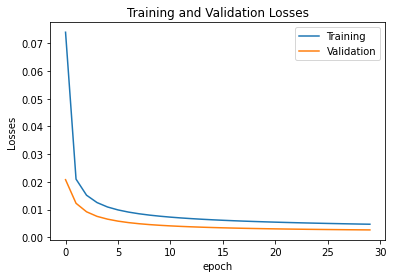

In [15]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'accuarcy')

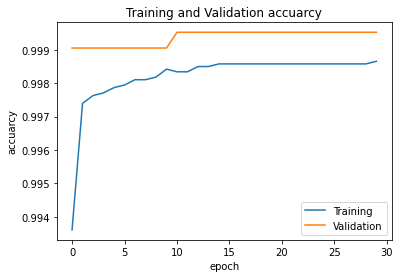

In [16]:
plt.plot(results.history['binary_accuracy'])
plt.plot(results.history['val_binary_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')


In [17]:
# plt.plot(results.history['accuracy'])
# plt.plot(results.history['val_accuracy'])
# plt.legend(['Training', 'Validation'])
# plt.title('Training and Validation accuarcy')
# plt.xlabel('epoch')
# plt.ylabel('accuarcy')
